In [1]:
# импортируем нужные библиотеки
import pandas as pd
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

**Задание 1:**

У Вас есть данные о продажах продукции определенного сегмента по регионам в количественном и денежном выражении за период с 3 квартала 2021 года по 3 квартал 2022 года включительно. Помимо этого в файле прилагается показатель значения населения по каждому региону (данный показатель является заданной константой).

**Задача:**
Проанализируйте и сделайте выводы о результатах работы регионов в 3 квартале 2022 года.



In [2]:
# загрузим исходные таблицы в датасеты
df_count = pd.read_csv(r'D:\pandas\Test sales analysis\Задание 1 - Количество.csv', index_col=0)

In [3]:
df_revenue = pd.read_csv(r'D:\pandas\Test sales analysis\Задание 1 - Выручка.csv', index_col=0)

In [4]:
df_population = pd.read_csv(r'D:\pandas\Test sales analysis\Задание 1 - Население.csv', index_col=0)

#### Предобработка данных

In [5]:
# удалить пробелы в числах
df_count = df_count.replace(r'\s+','',regex=True)
df_revenue = df_revenue.replace(r'\s+','',regex=True)
df_population = df_population.replace(',','.',regex=True)

In [6]:
# преобразование к типу данных
df_count=df_count.astype(float)
df_revenue=df_revenue.astype(float)
df_population=df_population.astype(float)

In [7]:
df_population['Население'] = df_population['Население'] * 100000

In [8]:
# создание вспомогательного датасета Количества продаж к населению Региона, относительные значения
df_count_population_diff = df_count.copy(deep=True)
df_count_population_diff.iloc[:, :] = df_count_population_diff.iloc[:, :].div(df_population.iloc[:, 0], axis=0) 
df_count_population_diff['Изменение 3кв. относительно среднего'] = (df_count_population_diff['3 квартал 2022 г.'] - (df_count_population_diff[['3 квартал 2021 г.', '4 квартал 2021 г.', '1 квартал 2022 г.', '2 квартал 2022 г.']].mean(axis=1))) / (df_count_population_diff[['3 квартал 2021 г.', '4 квартал 2021 г.', '1 квартал 2022 г.', '2 квартал 2022 г.']].mean(axis=1))
df_count_population_diff.sort_values(by=['3 квартал 2022 г.'], ascending=False, inplace=True)

In [9]:
# создание вспомогательного датасета выручка на 1 ед.продаж по регионам
df_revenue_1_sale = df_revenue.copy(deep=True)
df_revenue_1_sale = df_revenue.drop(['3 квартал 2021 г.', '4 квартал 2021 г.', '1 квартал 2022 г.', '2 квартал 2022 г.', '3 квартал 2022 г.'], axis= 1 )
df_revenue_1_sale['1_sale'] = df_revenue['3 квартал 2022 г.'] / df_count['3 квартал 2022 г.']

#### 1. Анализ результатов работы Регионов по метрике "Количество продаж в регионе на 100 человек населения"

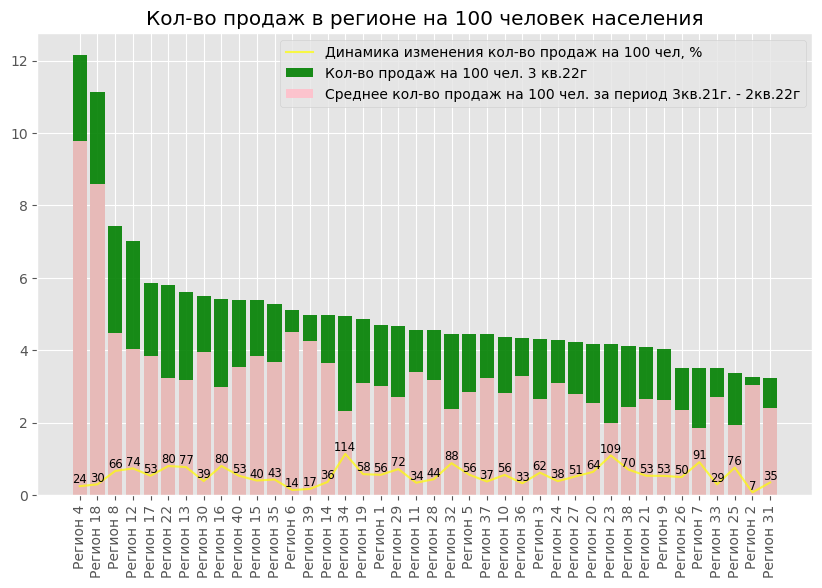

In [10]:
plt.style.use('ggplot')
plt.figure(figsize=(10,6))

plt.bar(df_count_population_diff.index, (df_count_population_diff['3 квартал 2022 г.'])*100, color='green', alpha=0.9)

plt.bar(df_count_population_diff.index, (df_count_population_diff[['3 квартал 2021 г.', '4 квартал 2021 г.', '1 квартал 2022 г.', '2 квартал 2022 г.']].mean(axis=1))*100, color='pink', alpha=0.9)

plt.plot(df_count_population_diff.index, (df_count_population_diff['Изменение 3кв. относительно среднего']), color='yellow', alpha=0.7)
plt.legend(['Динамика изменения кол-во продаж на 100 чел, %', 'Кол-во продаж на 100 чел. 3 кв.22г', 'Среднее кол-во продаж на 100 чел. за период 3кв.21г. - 2кв.22г',]);


for i, v in enumerate(df_count_population_diff['Изменение 3кв. относительно среднего']):
    plt.text(i, v, int(round(v*100, 0)), ha='center', va='bottom', size='small')
    
plt.xticks(rotation='vertical')
plt.title('Кол-во продаж в регионе на 100 человек населения');

**Комментарий к графику.**

Все регионы в 3 кв.22 года увеличили  продаж в регионе по сравнению со средним показателем продаж за предыдущие 4 квартала. 

Значения на графике показывают динамику изменения продаж в 3кв. в регионе по сравнению со средним значением. 

Максимальный рост кол-ва продаж (более 80%) в 3 кв. показывают регионы: 7, 16, 22, 23, 32, 34.

Минимальный рост (менее 20%) у Регионов: 2, 6, 39.

Лидерами по относительному количеству продаж в регионе в 3 кв. являются Регионы: 4 и 18. 

Аутсайдеры-регионы: 2, 7, 25, 26, 31, 33.


#### 2. Анализ результатов работы Регионов по метрике "Изменение кол-ва продаж в 3 кв.22г относительно прошлых периодов."

In [11]:
# создание вспомогательного датасета с поквартальным изменением количества продаж
df_count_diff = df_count.copy(deep=True)
df_count_diff = df_count_diff.drop(['3 квартал 2021 г.', '4 квартал 2021 г.', '1 квартал 2022 г.', '2 квартал 2022 г.', '3 квартал 2022 г.'], axis= 1 )
df_count_diff['Изменение 3 к 1.22г'] = (df_count['3 квартал 2022 г.'] - df_count['1 квартал 2022 г.'] ) / df_count['1 квартал 2022 г.'] * 100

df_count_diff['Изменение 3 к 2.22г'] = (df_count['3 квартал 2022 г.'] - df_count['2 квартал 2022 г.'] ) / df_count['2 квартал 2022 г.'] * 100
df_count_diff['Изменение 3 к 4.21г'] = (df_count['3 квартал 2022 г.'] - df_count['4 квартал 2021 г.'] ) / df_count['4 квартал 2021 г.'] * 100
df_count_diff['Изменение 3 к 3.21г'] = (df_count['3 квартал 2022 г.'] - df_count['3 квартал 2021 г.'] ) / df_count['3 квартал 2021 г.'] * 100
df_count_diff.sort_values(by=['Изменение 3 к 1.22г', 'Изменение 3 к 2.22г'], ascending=False, inplace=True)

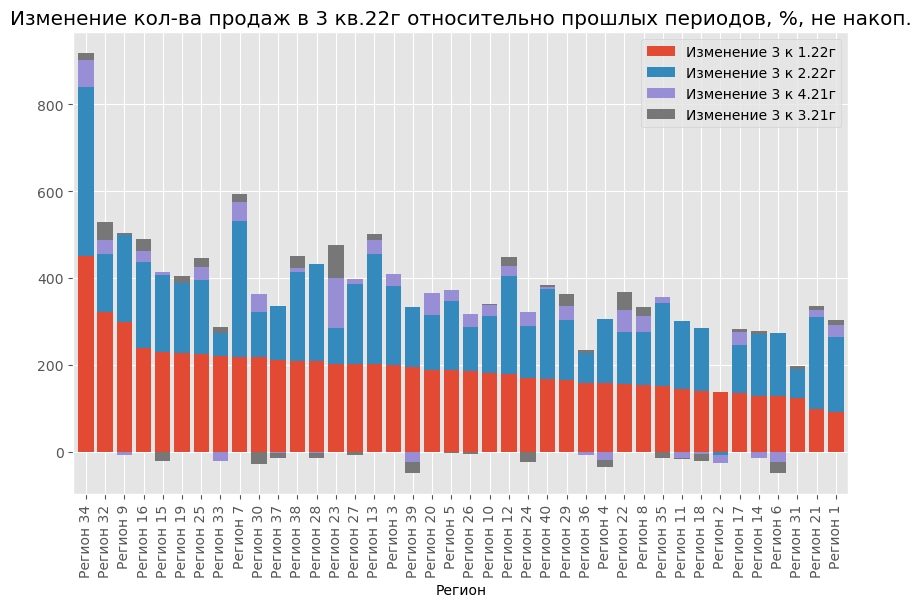

In [43]:
plt.style.use('ggplot')
df_count_diff.plot(kind='bar', figsize=(10 , 6),  stacked=True, width=0.8);
plt.title('Изменение кол-ва продаж в 3 кв.22г относительно прошлых периодов, %, не накоп.');

**Комментарий к графику.**

Максимальный рост количества продаж в 3 квартале 22г. наблюдаем относительно 1 и 2 квартала 22г. Данная тенденция прослеживается почти по всем регионам (синие и красные области на графике). Т.е. в этом году можно отметить тенденцию к росту количества продаж.

Однако, рост в 3 квартале 22г. относительного 3 и 4 кварталов прошлого года (серые и фиолетовые области на графике) не такой существенный и по некоторым регионам даже наблюдается небольшое снижение продаж (Регионы 2, 4, 6, 11, 14, 15, 18, 24, 30, 33, 35, 39).


#### 3. Анализ результатов работы Регионов по метрике "Выручка за 3 квартал 2022 г."

In [13]:
# создание вспомогательного датасета
df_revenue_ABC = df_revenue.copy()
df_revenue_ABC.sort_values(by='3 квартал 2022 г.', ascending=False, inplace=True)
df_revenue_ABC['cum_sum'] = df_revenue_ABC['3 квартал 2022 г.'].cumsum()
df_revenue_ABC['АВС'] = 0
for i in range(len(df_revenue_ABC['cum_sum'])):
    if df_revenue_ABC['cum_sum'].iloc[i] <= (0.8 * df_revenue_ABC['cum_sum'].iloc[-1]):
        df_revenue_ABC['АВС'].iloc[i] = 1.6 * 10000000  # группа А - числовое кодирование для отражения на графике
    if df_revenue_ABC['cum_sum'].iloc[i] > (0.8 * df_revenue_ABC['cum_sum'].iloc[-1]):
        df_revenue_ABC['АВС'].iloc[i] = 1.0 * 10000000  # группа В - числовое кодирование для отражения на графике
    if df_revenue_ABC['cum_sum'].iloc[i] > (0.95 * df_revenue_ABC['cum_sum'].iloc[-1]):
        df_revenue_ABC['АВС'].iloc[i] = 0.4 * 10000000  # группа С - числовое кодирование для отражения на графике

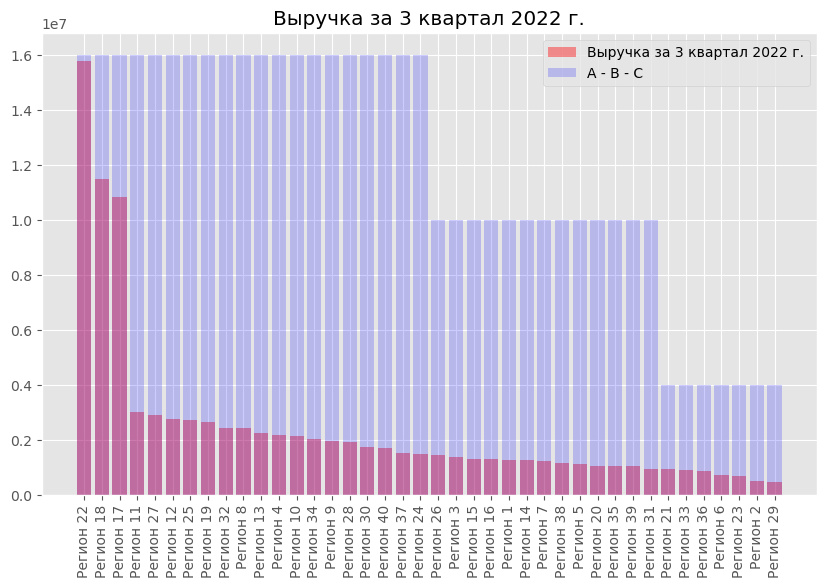

In [14]:
plt.style.use('ggplot')
plt.figure(figsize=(10,6))
plt.bar((df_revenue['3 квартал 2022 г.'].sort_values(axis=0, ascending=False)).index, (df_revenue['3 квартал 2022 г.'].sort_values(axis=0, ascending=False)), width=0.8, color='red', alpha=0.4)
plt.bar(df_revenue_ABC.index, df_revenue_ABC['АВС'], width=0.8, color='blue', alpha=0.2)
plt.title('Выручка за 3 квартал 2022 г.')
plt.legend(['Выручка за 3 квартал 2022 г.', 'A - B - C'])
plt.xticks(rotation='vertical');

**Комментарий к графику.**
В топе по абсолютной выручке в 3кв.лидируют регионы: 22, 18, 17.

Все регионы разделены на 3 группы (синяя лестница на графике):
- группа А - занимают долю 80% общей выручки нарастающим итогом (20 первых регионов на графике). Наиболее рентабельные регионы.
- группа В - следующие регионы, выручки на них приходится от 81% до 95%
- группа С - наименее рентабельные регионы. Регионы: 21, 33, 36, 6, 23, 2, 29.

#### 4. Анализ результатов работы Регионов по метрике "Динамика изменения выручки за 3 кв. относительно средней выручки за период 3кв.21 - 2кв.22г"

In [15]:
# создание вспомогательного Датасета
df_revenue_diff = df_revenue.copy(deep=True)
df_revenue_diff['average_annual'] = df_revenue[['3 квартал 2021 г.', '4 квартал 2021 г.', '1 квартал 2022 г.', '2 квартал 2022 г.']].mean(axis=1)
df_revenue_diff = df_revenue_diff.drop(['3 квартал 2021 г.', '4 квартал 2021 г.', '1 квартал 2022 г.', '2 квартал 2022 г.'], axis= 1 )
df_revenue_diff['difference'] = ((df_revenue_diff['3 квартал 2022 г.'] - df_revenue_diff['average_annual']) / df_revenue_diff['average_annual'] )
df_revenue_diff.sort_values(by='difference', ascending=False, inplace=True)


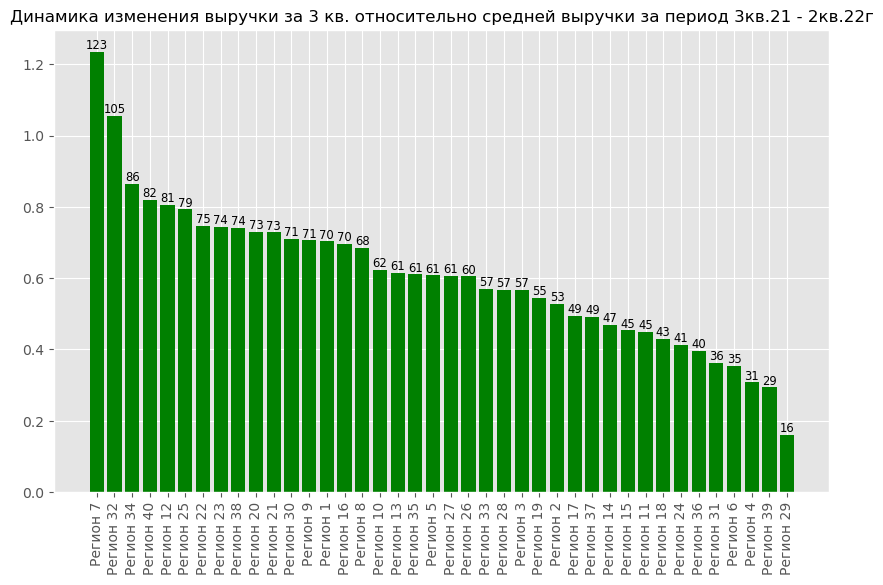

In [16]:
plt.style.use('ggplot')
plt.figure(figsize=(10,6))
plt.bar(df_revenue_diff.index, df_revenue_diff['difference'], color='green')

for i, v in enumerate(df_revenue_diff['difference']):
    plt.text(i, v, int(round(v*100, 0)), ha='center', va='bottom', size='small') 

plt.xticks(rotation='vertical')
plt.title('Динамика изменения выручки за 3 кв. относительно средней выручки за период 3кв.21 - 2кв.22г', fontsize=12);

**Комментарий к графику.**

Все регионы увеличили выручку в 3кв 22г. относительно средней выручки за период 3кв.21 - 2кв.22г. 

Регионы-лидеры в данной категории: 7 и 32 - увеличение более 100%.

Регионы-аутсайдеры: 36, 31, 64, 4, 39 - увеличение менее 40%, регион 29 - увеличение 16%. 

#### 5. Анализ результатов работы Регионов по метрике "Изменение выручки в 3 кв.22г относительно прошлых периодов."

In [17]:
# создание вспомогательного датасета
df_revenue_diff_quar = df_revenue.drop(['3 квартал 2021 г.', '4 квартал 2021 г.', '1 квартал 2022 г.', '2 квартал 2022 г.', '3 квартал 2022 г.'], axis= 1 )
df_revenue_diff_quar['Изменение 3 к 1.22г'] = (df_revenue['3 квартал 2022 г.'] - df_revenue['1 квартал 2022 г.'] ) / df_revenue['1 квартал 2022 г.'] * 100
df_revenue_diff_quar['Изменение 3 к 2.22г'] = (df_revenue['3 квартал 2022 г.'] - df_revenue['2 квартал 2022 г.'] ) / df_revenue['2 квартал 2022 г.'] * 100
df_revenue_diff_quar['Изменение 3 к 4.21г'] = (df_revenue['3 квартал 2022 г.'] - df_revenue['4 квартал 2021 г.'] ) / df_revenue['4 квартал 2021 г.'] * 100
df_revenue_diff_quar['Изменение 3 к 3.21г'] = (df_revenue['3 квартал 2022 г.'] - df_revenue['3 квартал 2021 г.'] ) / df_revenue['3 квартал 2021 г.'] * 100
df_revenue_diff_quar.sort_values(by=['Изменение 3 к 1.22г', 'Изменение 3 к 2.22г'], ascending=False, inplace=True)

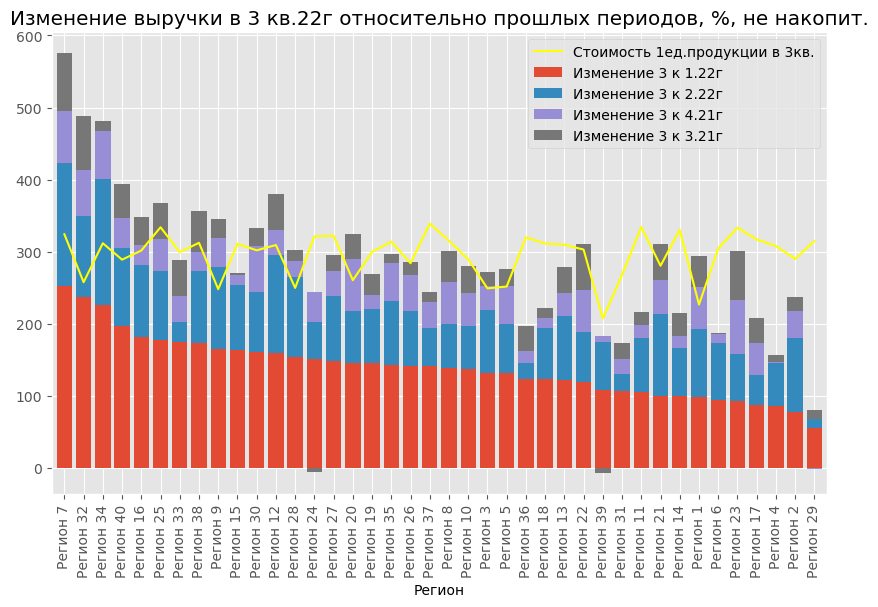

In [52]:
plt.style.use('ggplot')
df_revenue_diff_quar.plot(kind='bar', figsize=(10 , 6),  stacked=True, width=0.8);
plt.xticks(rotation='vertical')
plt.plot(df_revenue_1_sale.index, (df_revenue_1_sale['1_sale']), color='yellow', label='Стоимость 1ед.продукции в 3кв.');
plt.title('Изменение выручки в 3 кв.22г относительно прошлых периодов, %, не накопит.')
plt.legend(bbox_to_anchor=(1,1));   # добавление совместной легенды с 2х графиков

**Комментарий к графику.**

Практически по всем регионам можно наблюдать рост выручки в 3 квартале относительно предыдущих рассматриваемых периодов.

Если рассматривать изменение выручки поквартально, то аналогично с кол-вом продаж, максимальное увеличение роста выручки в 3кв. - относительно 1кв. и 2кв. 22г. Регионы-лидеры с максимальным увеличением выручки (в 3кв.относительно 1кв.22г) - 7, 32, 34 - более 200%.

Рост выручки в 3кв. относительно 3 и 4 кварталов 2021г. существенно ниже. Можно отметить небольшое снижение выручки в 3кв.22г относительно аналогичного периода в 21г по регионам: 24, 39. Причем в регионе 39 наблюдается самая низкая стоимость 1 ед. продукции в 3 кв.22г.

### Заключение.

**Общие выводы**

Все регионы в 3 кв.22 года увеличили свое относительное количество продаж в регионе (на 100 чел. населения) по сравнению со средним показателем продаж за предыдущие 4 квартала. 

Максимальный показатель увеличения количества продаж и выручки в 3 квартале 22г. наблюдаем относительно первых двух кварталов 2022г. Данная тенденция прослеживается почти по всем регионам. 

Однако, рост в 3 квартале 22г. относительного 3 и 4 кварталов прошлого года не такой существенный и по некоторым регионам даже наблюдается небольшой спад кол-ва продаж (Регионы 2, 4, 6, 11, 14, 15, 18, 24, 30, 33, 35, 39). Но выручка по данным регионам в 3кв. имеет отрицательное изменение только в Регионах 24 и 39 (относительно 3кв.21г.). По всем остальным регионам можно наблюдать рост выручки в 3 квартале относительно предыдущих рассматриваемых периодов, а также относительно своей средней выручки за период 3кв.21 - 2кв.22г. 





**Выводы по регионам:**

- **Количество продаж в регионе на 100 человек населения.**

Максимальное увеличение доли продаж в регионе (более 80%) в 3 кв. показывают регионы: 7, 16, 22, 23, 32, 34.

Минимальное увеличение доли продаж в регионе (менее 20%) у Регионов: 2, 6, 39.

Лидерами по этой метрике в 3 кв. являются Регионы: 4 и 18, имеющие более 10 продаж на 100 человек населения своего региона.

Аутсайдеры-регионы: 2, 7, 25, 26, 31, 33 - менее 4 продаж на 100 человек населения своего региона.


- **Изменение выручки за 3 квартал 2022 г.**

В топе по абсолютной выручке в 3кв.лидируют регионы: 22, 18, 17.

Все регионы разделены на 3 группы (синяя лестница на графике):
- группа А - занимают долю 80% общей выручки нарастающим итогом (22, 18, 17, 11, 27, 12, 25, 19, 32, 8, 13, 4, 10, 34, 9, 28, 30, 40, 37, 24). Это наиболее рентабельные регионы.
- группа В - следующие регионы, выручки на них приходится от 81% до 95%
- группа С - наименее рентабельные регионы. Регионы: 21, 33, 36, 6, 23, 2, 29.


Все регионы увеличили выручку в 3кв 22г. относительно своей средней выручки за период 3кв.21 - 2кв.22г. 

- Регионы-лидеры в данной категории: 7 и 32 - увеличение выручки относительно своей средней выручки более 100%.

- Регионы-аутсайдеры: 36, 31, 64, 4, 39 - увеличение менее 40%, регион 29 - увеличение на 16%. 

Если рассматривать изменение выручки поквартально, то Регионы-лидеры с максимальным увеличением выручки (в 3кв.относительно 1кв.22г) - 7, 32, 34 - более 200%. Аутсайдер - Регион 29.

Рост выручки в 3кв.22г. относительно 3 и 4 кварталов 2021г. существенно ниже. Можно отметить небольшое снижение выручки в 3кв.22г относительно аналогичного периода в 21г по регионам: 24, 39. Причем, в регионе 39 наблюдается самая низкая стоимость 1ед. продукции в 3 кв.22г.
